In [ ]:
pip install tensorflow==2.5.0

In [ ]:
pip install tensorflow_hub

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import zipfile,shutil


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split
import matplotlib
import sklearn

In [ ]:
class mC(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.99):
            self.model.stop_training = True

callbacks = mC()

ALPHABETH

In [ ]:
pip install tensorflow keras numpy matplotlib

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/My Drive/Bangkit/CapstoneProject/handwritten_data_785.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
(X_train,y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#Reshape the data to fit the model
X_train = X_train.reshape(60000, 28,28,1)
X_test = X_test.reshape(10000, 28, 28, 1)
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
X_train[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [ ]:
y_train[0]

5

In [ ]:
#One-Hot Encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
#Print the new label
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


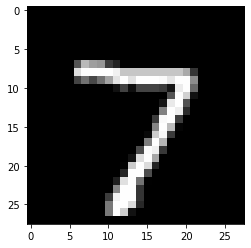

In [ ]:
for i in range(1):
    image = X_test[i]
    image = np.array(image, dtype = 'float')
    pixels = image.reshape((28,28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
#input_shape = [X_train.shape[1]]
#print("Input shape: {}".format(input_shape))

model = keras.Sequential([
    layers.Conv2D(100,  kernel_size = 3, activation='relu', input_shape = (28,28,1) ),
    layers.Conv2D(54,  kernel_size = 3, activation='relu'),    
    layers.Conv2D(24, kernel_size = 3, activation='relu'),
    layers.Conv2D(14, kernel_size = 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

In [ ]:
#define the loss and optimizer
#
#Compile the model 
#model.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
#Compile the model 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/10
1200/1200 [==============================] - 476s 396ms/step - loss: 0.1860 - accuracy: 0.9517 - val_loss: 0.0665 - val_accuracy: 0.9792
Epoch 2/10
1200/1200 [==============================] - 468s 390ms/step - loss: 0.0592 - accuracy: 0.9822 - val_loss: 0.0509 - val_accuracy: 0.9822
Epoch 3/10
1200/1200 [==============================] - 458s 382ms/step - loss: 0.0462 - accuracy: 0.9857 - val_loss: 0.0637 - val_accuracy: 0.9793
Epoch 4/10
1200/1200 [==============================] - 462s 385ms/step - loss: 0.0375 - accuracy: 0.9884 - val_loss: 0.0475 - val_accuracy: 0.9854
Epoch 5/10
1200/1200 [==============================] - 457s 381ms/step - loss: 0.0322 - accuracy: 0.9893 - val_loss: 0.0508 - val_accuracy: 0.9853
Epoch 6/10
1200/1200 [==============================] - 461s 384ms/step - loss: 0.0242 - accuracy: 0.9923 - val_loss: 0.0537 - val_accuracy: 0.9846
Epoch 7/10
1200/1200 [==============================] - 473s 394ms/step - loss: 0.0206 - accuracy: 0.9931 - val_

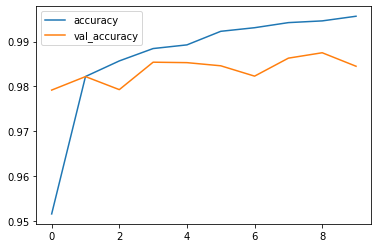

In [ ]:
#train the model
#hist = model.fit(
#   X_train, y_train,
#    batch_size=128,
#    epochs=10
#)
hist = model.fit(X_train, y_train_one_hot, validation_data=(X_test, y_test_one_hot), batch_size=50, epochs=10)
hist_df = pd.DataFrame(hist.history)
hist_df.loc[:, ['accuracy', 'val_accuracy']].plot();
print("Minimum validation accuracy: {}".format(hist_df['val_accuracy'].min()))

In [ ]:
X_test[:10]

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [ ]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'Train' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  


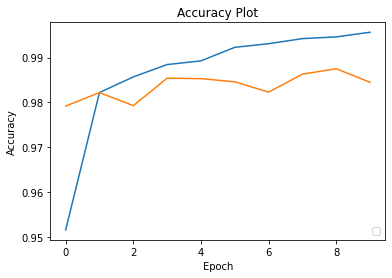

In [ ]:
import pandas as pd

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'],['Val'],loc='lower right')
plt.show()


Minimum validation loss: 0.04745258763432503


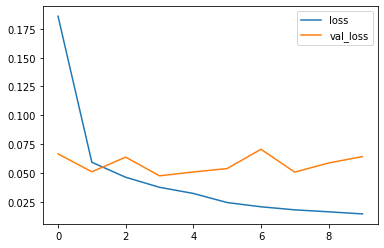

In [ ]:
hist_df = pd.DataFrame(hist.history)
hist_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(hist_df['val_loss'].min()))

Minimum validation accuracy: 0.979200005531311


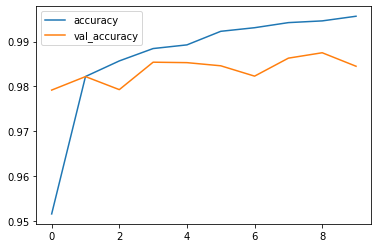

In [ ]:
hist_df = pd.DataFrame(hist.history)
hist_df.loc[:, ['accuracy', 'val_accuracy']].plot();
print("Minimum validation accuracy: {}".format(hist_df['val_accuracy'].min()))

NUMBER

In [ ]:
from keras.layers import Dense, Flatten 
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical as to_cat
from keras.models import load_model
from keras import models

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import csv

In [ ]:
train = pd.read_csv("/content/drive/My Drive/Bangkit/CapstoneProject/mnist_train.csv")
print(train.shape)
train.head()

(60000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
test = pd.read_csv("/content/drive/My Drive/Bangkit/CapstoneProject/mnist_test.csv")
print(test.shape)
test.head()

(10000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train=train.drop(labels=["label"],axis=1)
Y_train=train["label"]

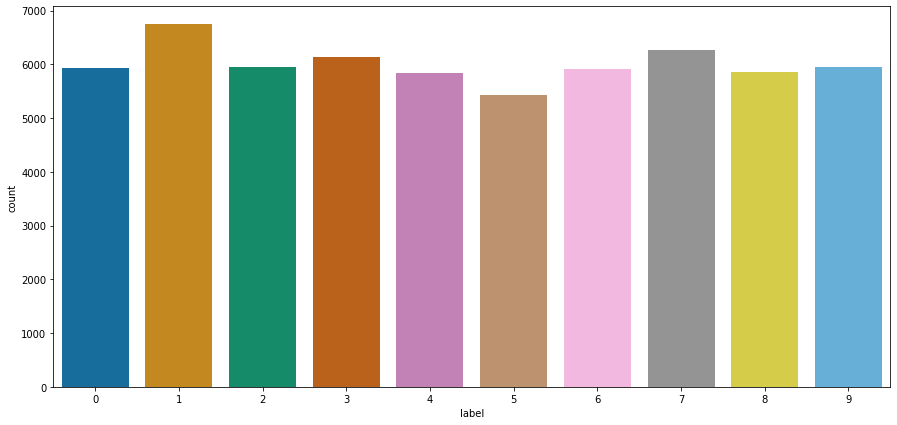

In [ ]:
plt.figure(figsize=(15,7))
g=sns.countplot(Y_train,palette="colorblind")

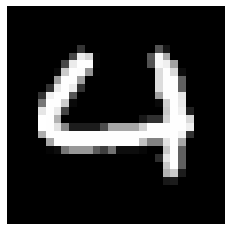

In [ ]:
img = X_train.iloc[60].values.reshape(28,28)
img.shape
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.show()

In [ ]:
Y_train.value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

In [ ]:
#Normalization
X_test=test.drop(labels=["label"],axis=1)
Y_test=test["label"]

In [ ]:
X_train=X_train/225.0
X_test=X_test/225.0
print("X_train: ",X_train.shape)
print("X_test shape: ",X_test.shape)

X_train:  (60000, 784)
X_test shape:  (10000, 784)


In [ ]:
#Reshape
X_train=X_train.values.reshape(-1,28,28,1)
X_test=X_test.values.reshape(-1,28,28,1)
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)

X_train shape:  (60000, 28, 28, 1)
X_test shape:  (10000, 28, 28, 1)


In [ ]:
#label encoding
from keras.utils.np_utils import to_categorical
Y_train=to_categorical(Y_train,num_classes=10)

In [ ]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
Y_test=to_categorical(Y_test,num_classes=10)

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.1,random_state=2)
print("x_train: ",X_train.shape)
print("x_test: ",X_val.shape)
print("y_train: ",Y_train.shape)
print("x_test: ",Y_val.shape)

x_train:  (54000, 28, 28, 1)
x_test:  (6000, 28, 28, 1)
y_train:  (54000, 10)
x_test:  (6000, 10)


In [ ]:
#CNN model
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='Same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])
batch_size=32
epochs=100 

model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='Same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])
batch_size=32
epochs=100

In [ ]:
datagen=ImageDataGenerator(featurewise_center=False,
                           samplewise_center=False,
                           featurewise_std_normalization=False,
                           samplewise_std_normalization=False,
                           zca_whitening=False,
                           rotation_range=5,
                           zoom_range=0.1,
                           width_shift_range=0.1,
                           height_shift_range=0.1,
                           horizontal_flip=False,
                           vertical_flip=False)
datagen.fit(X_train)

In [ ]:
history=model.fit_generator(datagen.flow(X_train,Y_train,batch_size=batch_size),
                            epochs=epochs,validation_data=(X_val,Y_val),
                            steps_per_epoch=1600//batch_size)

Epoch 1/100
50/50 [==============================] - 5s 76ms/step - loss: 2.2456 - accuracy: 0.1540 - val_loss: 1.3880 - val_accuracy: 0.6800
Epoch 2/100
50/50 [==============================] - 3s 68ms/step - loss: 1.5585 - accuracy: 0.4924 - val_loss: 0.6067 - val_accuracy: 0.8370
Epoch 3/100
50/50 [==============================] - 3s 67ms/step - loss: 1.0583 - accuracy: 0.6422 - val_loss: 0.3888 - val_accuracy: 0.8960
Epoch 4/100
50/50 [==============================] - 3s 69ms/step - loss: 0.7676 - accuracy: 0.7467 - val_loss: 0.3268 - val_accuracy: 0.9030
Epoch 5/100
50/50 [==============================] - 3s 69ms/step - loss: 0.7024 - accuracy: 0.7865 - val_loss: 0.2690 - val_accuracy: 0.9243
Epoch 6/100
50/50 [==============================] - 4s 74ms/step - loss: 0.5589 - accuracy: 0.8282 - val_loss: 0.2182 - val_accuracy: 0.9340
Epoch 7/100
50/50 [==============================] - 4s 75ms/step - loss: 0.4709 - accuracy: 0.8455 - val_loss: 0.1889 - val_accuracy: 0.9433
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


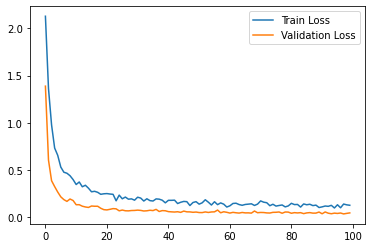

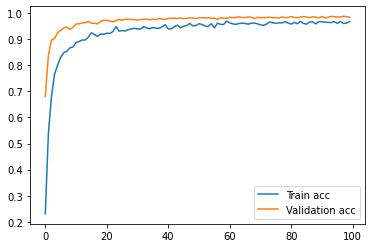

In [ ]:
print(history.history.keys())
plt.plot(history.history["loss"], label = "Train Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(history.history["accuracy"], label = "Train acc")
plt.plot(history.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


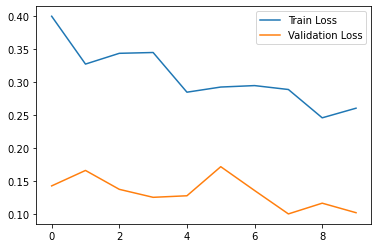

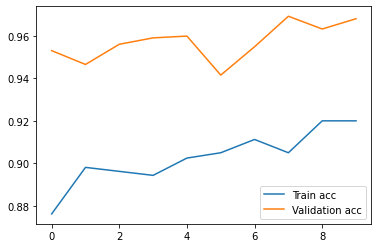

In [ ]:
print(history.history.keys())
plt.plot(history.history["loss"], label = "Train Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(history.history["accuracy"], label = "Train acc")
plt.plot(history.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

In [ ]:
model.save('new_mnist.h5')

In [ ]:
Model = load_model('new_mnist.h5')

In [ ]:
Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


OCR 

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (5,363 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [ ]:
import cv2
import numpy as np
import json
import re
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

import sys
sys.path.append('content/gdrive/My Drive')

In [ ]:
class KTPInformation(object):
    def __init__(self):
        self.nik = ""
        self.nama = ""
        self.tempat_lahir = ""
        self.tanggal_lahir = ""
        self.jenis_kelamin = ""
        self.golongan_darah = ""
        self.alamat = ""
        self.rt = ""
        self.rw = ""
        self.kelurahan_atau_desa = ""
        self.kecamatan = ""
        self.agama = ""
        self.status_perkawinan = ""
        self.pekerjaan = ""
        self.kewarganegaraan = ""
        self.berlaku_hingga = "SEUMUR HIDUP"


In [ ]:
class KTPOCR(object):
    def __init__(self, image):
        self.image = cv2.imread(image)
        self.gray = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)
        self.th, self.threshed = cv2.threshold(self.gray, 127, 255, cv2.THRESH_TRUNC)
        self.result = KTPInformation()
        self.master_process()

    def process(self, image):
        #raw_extracted_text = pytesseract.image_to_string((self.threshed), lang="ind")
        #raw_extracted_text = pytesseract.image_to_string((image), lang="new_mnist(.h5)", boxes=True)
        raw_extracted_text = pytesseract.image_to_string((image), lang="new_mnist(.h5)")
        return raw_extracted_text

    def word_to_number_converter(self, word):
        word_dict = {
            "L" : "1",
            "l" : "1",
            "b" : "6",
            "O" : "0",
            "A" : "4",
            "Z" : "2",
            "z" : "2",
            "S" : "5",
            "s" : "5",
            "B" : "8",
            "D" : "0",
            "o" : "0",
            "?" : "7"
        }
        res = ""
        for letter in word:
            if letter in word_dict:
                res += word_dict[letter]
            else:
                res += letter
        return res
    
    def extract(self, extracted_result):
        print(extracted_result.replace('\n', ' '))
        for word in extracted_result.split("\n"):
            if "NIK" in word:
                word = word.split(':')
                self.result.nik = self.word_to_number_converter(word[-1].replace(" ", ""))
                continue

            if "Nama" in word:
                word = word.split(':')
                self.result.nama = word[-1]
                continue

            if "Lahir" in word:
                print(word)
                word = word.split(':')
                self.result.tanggal_lahir = re.search("([0-9]{2}\-[0-9]{2}\-[0-9]{4})", word[-1])[0]
                self.result.tempat_lahir = word[-1].replace(self.result.tanggal_lahir, '')
                continue

            #if "Lahir" in word:
                #word = word.split(':')
                #self.result.tanggal_lahir = re.search("([0-9]{2}\-[0-9]{2}\-[0-9]{4})", word[-1])[0]
                #self.result.tempat_lahir = word[-1].replace(self.result.tanggal_lahir, '')
                #continue

            if 'Gol' in word:
                #word = word.split(':')
                self.result.jenis_kelamin = re.search("(LAKI-LAKI|LAKI|LELAKI|PEREMPUAN)", word)[0]
                word = word.split(':')
                self.result.golongan_darah = re.search("(O|A|B|AB)", word[-1])[0]

                #if gol == "0" :
                #  gol = "O"

                #self.result.golongan_darah = gol
                continue

            if 'Alamat' in word:
                self.result.alamat = re.sub(r'^\W*\w+\W*', '', word)
                continue
            
            if 'RW' in word:
                word = re.sub(r'^\W*\w+\W*', '', word)

                if " " in word:
                  a = word.split(" ")

                elif "/" in word:
                  a = word.split("/")

                  self.result.rt=a[0][-3:]
                  self.result.rw=a[1][-3:]
                  continue

            if 'Kel' in word:
                word = re.sub(r'^\W*\w+\W*', '', word)
                word = word.split(":")
                self.result.kelurahan_atau_desa = word[1]
                continue

            if 'Kecamatan' in word:
                word = re.sub(r'^\W*\w+\W*', '', word)
                self.result.kecamatan = word
                continue

            if 'Agama' in word:
                self.result.agama = re.search("(ISLAM|KRISTEN|KATOLIK|HINDU|BUDDHA|KONG HU CU)", word)[0]
                continue

            #if 'Status' in word:
                #self.result.status_perkawinan = re.search("(KAWIN|BELUM KAWIN|DUDA CERAI|DUDA MATI|JANDA CERAI|JANDA MATI)", word)[0]
                #continue
         
            if 'Pekerjaan' in word:
                word = re.sub(r'^\W*\w+\W*', '', word)
                word = word.split(' ')
                self.result.pekerjaan = word[0]
                continue

            if 'Kewarganegaraan' in word:
                self.result.kewarganegaraan = re.search("(WNI|WNA)", word)[0]
                
            
                
    def master_process(self):
        raw_text = self.process(self.image)
        self.extract(raw_text)

    def pun_rem(self,text):
        punctuations = '''!()[]{}'"\<>?@#$%^&*_~'''
        no_punct = ""
        for char in text:
          if char not in punctuations:
            no_punct = no_punct + char
        return no_punct
        
    def to_json(self):
        return json.dumps(self.result.__dict__)
    


In [ ]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [ ]:
Image = cv2.imread("/content/drive/My Drive/Bangkit/sampel/ktp1.jpg")

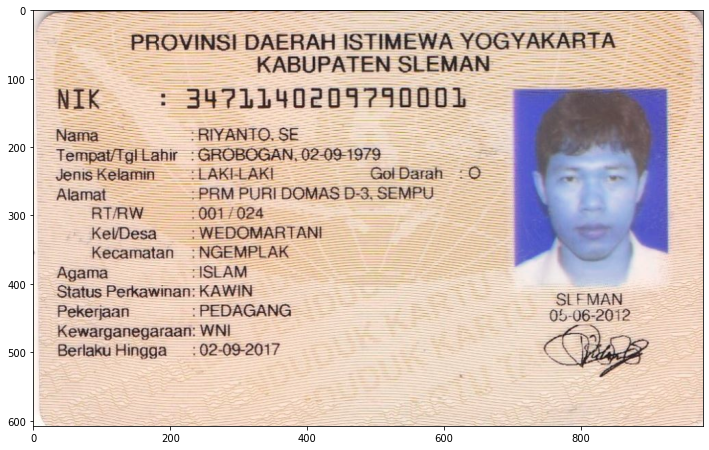

In [ ]:
display(Image)

In [ ]:
#image = KTPOCR("/content/drive/My Drive/Bangkit/sampel/ktp1.jpg")

In [ ]:
#Image.to_json()

In [ ]:
filename = 'address1_203.png'
img = Image.open(cam_img+filename)

ocr_out = ocr.image_to_string(img, lang='por', config='-psm 7')

print(ocr_out)